<a href="https://colab.research.google.com/github/TommasoQ/TreasurePuzzle/blob/main/NOpt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Implement a solver for the following puzzle: given a square grid of size SxS. The grid is divided in S areas composed of connected positions with possibly different sizes. Each position on the grid either has a "treasure" or it doesn't. For each horizontal and vertical line and area of the grid there is exactly N treasures. Two treasures cannot be in adjacent positions (neither orthogonal nor diagonal). Implement a mathematical solver to solve a given grid and verify that exactly 1 solution exists.



# Mathematical Formulation of the Treasure Puzzle

Let $S$ be the size of the grid, and let the grid be divided into $S$ areas with connected positions.

## Variables
- $x_{ij}$ - binary variable for each position $(i, j)$ on the grid, where $x_{ij} = 1$ if there is a treasure at position $(i, j)$, and $x_{ij} = 0$ otherwise.

## Constraints
- Each row and column must have exactly $N$ treasures, where $N \in \mathbb{N}$:

    $$ \sum_{j=1}^{S} x_{ij} = N \ \forall i \in {1, ..., S} $$
    $$ \sum_{i=1}^{S} x_{ij} = N \ \forall j \in {1, ..., S} $$

- Each area $A_k$ must have exactly N treasures:

    $$ \sum_{(i, j) in A_k} x_{ij} = N \ \forall k \in {1, ..., S} $$

- No two treasures can be adjacent (neither orthogonal nor diagonal):

    $$x_{ij} + x_{i'j'} \leq 1 \ \forall \ (i, j), (i', j') : |i - i'| \leq 1 \wedge \ |j - j'| \leq 1 \ \forall \ (i, j) \neq (i', j')$$

    $$\forall \ i,i',j,j' \in {1, ..., S}$$

## Objective
The objective is to find a feasible assignment of treasures that satisfies all the constraints and to check if such assignment is unique.


In [ ]:
!pip install gurobipy
!pip install matplotlib
!pip install numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 19.5 MB/s eta 0:00:00


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_areas(areas):
    grid_size = (len(areas), len(areas))
    grid = np.zeros(grid_size)

    # Assign different values to different areas
    for index, area in enumerate(areas, start=1):
        for x, y in area:
            grid[x, y] = index

    # Re-plot the grid without attempting to remove the non-existent color bar
    fig, ax = plt.subplots()

    # Move the x-axis to the top
    ax.xaxis.set_label_position('top')
    ax.xaxis.tick_top()

    # Plot the grid
    ax.imshow(grid, cmap='tab10', origin='upper')

    # Shift the axes by 0.5
    ax.set_xticks(np.arange(-0.5, grid_size[1], 1))
    ax.set_yticks(np.arange(-0.5, grid_size[0], 1))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.grid(which='both', color='black', linestyle='-', linewidth=1)

    # Remove tick labels
    ax.tick_params(axis='both', which='both', length=0)
    plt.show()

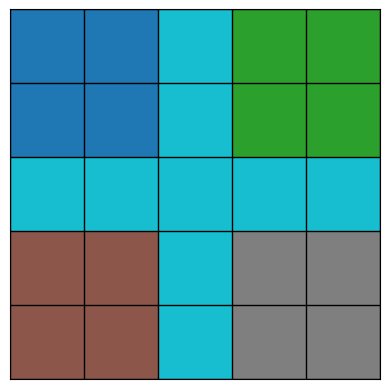

In [ ]:
# A general example (aesthetically pleasing).

S = 5
areas = [
    [(0,0),(0,1),(1,0),(1,1)],
    [(0,3),(0,4),(1,3),(1,4)],
    [(3,0),(3,1),(4,0),(4,1)],
    [(3,3),(3,4),(4,3),(4,4)],
    [(0,2),(1,2),(2,0),(2,1),(2,2),(2,3),(2,4),(3,2),(4,2)]
]
visualize_areas(areas)

N = 1

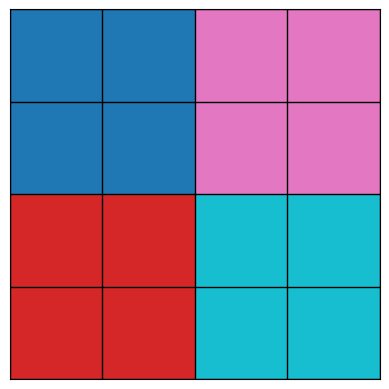

In [ ]:
# 4x4 (N=1) case with multiple solutions.

S = 4
areas = [
    [(0,0),(0,1),(1,0),(1,1)],
    [(2,0),(2,1),(3,0),(3,1)],
    [(0,2),(0,3),(1,2),(1,3)],
    [(2,2),(2,3),(3,2),(3,3)],
]
visualize_areas(areas)

N = 1

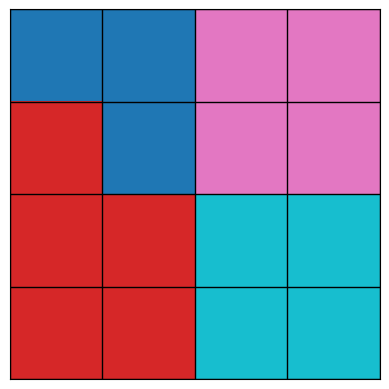

In [ ]:
# 4x4 (N=1) case with a unique solution.

S = 4
areas = [
    [(0,0),(0,1),(1,1)],
    [(1,0),(2,0),(2,1),(3,0),(3,1)],
    [(0,2),(0,3),(1,2),(1,3)],
    [(2,2),(2,3),(3,2),(3,3)],
]
visualize_areas(areas)

N = 1

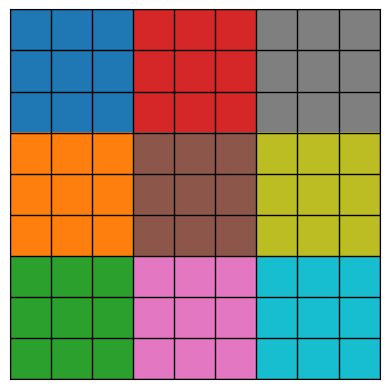

In [ ]:
# 9x9 (N=2) case with multiple solutions.

S = 9
areas = [
    # Define each area with a list of tuples representing the grid positions
    [(0,0),(0,1),(0,2),(1,0),(1,1),(1,2),(2,0),(2,1),(2,2)],
    [(3,0),(3,1),(3,2),(4,0),(4,1),(4,2),(5,0),(5,1),(5,2)],
    [(6,0),(6,1),(6,2),(7,0),(7,1),(7,2),(8,0),(8,1),(8,2)],
    [(0,3),(0,4),(0,5),(1,3),(1,4),(1,5),(2,3),(2,4),(2,5)],
    [(3,3),(3,4),(3,5),(4,3),(4,4),(4,5),(5,3),(5,4),(5,5)],
    [(6,3),(6,4),(6,5),(7,3),(7,4),(7,5),(8,3),(8,4),(8,5)],
    [(0,6),(0,7),(0,8),(1,6),(1,7),(1,8),(2,6),(2,7),(2,8)],
    [(3,6),(3,7),(3,8),(4,6),(4,7),(4,8),(5,6),(5,7),(5,8)],
    [(6,6),(6,7),(6,8),(7,6),(7,7),(7,8),(8,6),(8,7),(8,8)],
]
visualize_areas(areas)

N = 2 # Desired number of treasures per row, column and area

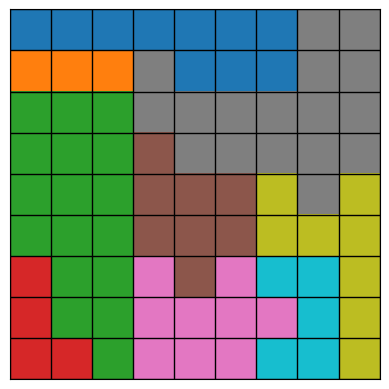

In [ ]:
# 9x9 (N=2) case with a unique solution.

S = 9
areas = [
    [(0,0),(0,1),(0,2),(0,3),(0,4),(0,5),(1,4),(1,5),(1,6),(0,6)],
    [(1,0),(1,1),(1,2)],
    [(2,0),(2,1),(2,2),(3,0),(3,1),(3,2),(4,0),(4,1),(4,2),(5,0),(5,1),(5,2),(6,1),(6,2),(7,1),(7,2),(8,2)],
    [(6,0),(7,0),(8,0),(8,1)],
    [(3,3),(4,3),(4,4),(4,5),(5,3),(5,4),(5,5),(6,4)],
    [(6,3),(6,5),(7,3),(7,4),(7,5),(7,6),(8,3),(8,4),(8,5)],
    [(0,7),(0,8),(1,3),(1,7),(1,8),(2,3),(2,4),(2,5),(2,6),(2,7),(2,8),(3,4),(3,5),(3,6),(3,7),(3,8),(4,7)],
    [(4,6),(4,8),(5,6),(5,7),(5,8),(6,8),(7,8),(8,8)],
    [(6,6),(6,7),(7,7),(8,6),(8,7)]
]
visualize_areas(areas)

N = 2

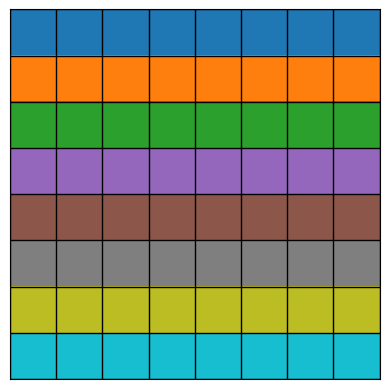

In [ ]:
# Relaxation of the 8 queens puzzle.
# The set of the solutions found by Guruby will include valid solutions for the 8 queens puzzle (as well as invalid ones).

S = 8 # Example grid size
areas = [
    [(0,0),(0,1),(0,2),(0,3),(0,4),(0,5),(0,6),(0,7)],
    [(1,0),(1,1),(1,2),(1,3),(1,4),(1,5),(1,6),(1,7)],
    [(2,0),(2,1),(2,2),(2,3),(2,4),(2,5),(2,6),(2,7)],
    [(3,0),(3,1),(3,2),(3,3),(3,4),(3,5),(3,6),(3,7)],
    [(4,0),(4,1),(4,2),(4,3),(4,4),(4,5),(4,6),(4,7)],
    [(5,0),(5,1),(5,2),(5,3),(5,4),(5,5),(5,6),(5,7)],
    [(6,0),(6,1),(6,2),(6,3),(6,4),(6,5),(6,6),(6,7)],
    [(7,0),(7,1),(7,2),(7,3),(7,4),(7,5),(7,6),(7,7)],
]
visualize_areas(areas)

N = 1

In [ ]:
# Functions for data sanity check

def is_partition(areas, S):
    # Create an NxN matrix filled with False
    matrix = [[False]*S for _ in range(S)]

    for area in areas:
        for x, y in area:
            # If a position is out of bounds or already included in another area, it's not a partition
            if x < 0 or x >= S or y < 0 or y >= S or matrix[x][y]:
                return False
            matrix[x][y] = True

    # If all positions in the matrix are included in an area, it's a partition
    return all(all(row) for row in matrix)

def dfs(position, visited):
        x, y = position
        if position in visited:
            return

        visited.add(position)
        for dx, dy in [(0, 1), (1, 0), (0, -1), (-1, 0)]:
            new_position = (x + dx, y + dy)
            if new_position in area:
                dfs(new_position, visited)

def is_connected(area):
    visited = set()
    # Start dfs from the first position in the area
    dfs(area[0], visited)
    # If all positions are visited, then the area is connected
    return visited == set(area)

In [ ]:
# Data sanity check

if N < 1 and type(N) != int:
    raise Exception("N must be a strictly positive integer.")

if len(areas) != S:
    raise Exception("Number of areas does not equal to the size of the matrix.")

if not is_partition(areas, S):
    raise Exception("Areas do not cover the whole grid.")

for i, area in enumerate(areas):
    if not is_connected(area):
        raise Exception(f"Area {i} is not connected.")

print("The designated areas are valid.")

The designated areas are valid.


In [ ]:
from gurobipy import Model, GRB

# Create a new model
m = Model("treasure_puzzle")

# Add variables for each cell in the grid
x = m.addVars(S, S, vtype=GRB.BINARY, name="x")

# Add constraints
# Each row and column must have exactly one treasure
for i in range(S):
    m.addConstr(sum(x[i, j] for j in range(S)) == N, f"row_{i}_constraint")
    m.addConstr(sum(x[j, i] for j in range(S)) == N, f"col_{i}_constraint")

# Each area must have exactly one treasure
for k, area in enumerate(areas):
    m.addConstr(sum(x[i, j] for i, j in area) == N, f"area_{k}_constraint")

# No two treasures can be adjacent
for i in range(S):
    for j in range(S):
        for di in range(-1, 2):
            for dj in range(-1, 2):
                if (di, dj) != (0, 0) and 0 <= i + di < S and 0 <= j + dj < S:
                    m.addConstr(x[i, j] + x[i + di, j + dj] <= 1, f"adj_{i}_{j}_{di}_{dj}_constraint")

# Since there's no objective function (we just want to find a feasible solution),
# we can set an arbitrary objective, like maximizing the sum of all treasures
m.setObjective(sum(x[i, j] for i in range(S) for j in range(S)), GRB.MAXIMIZE)

m.setParam(GRB.Param.PoolSearchMode, 2) # Parameter aimed at finding as many solutions as possible
m.setParam(GRB.Param.PoolSolutions, 100) # How many solutions you want to store
m.update()

Set parameter PoolSearchMode to value 2
Set parameter PoolSolutions to value 100
Maximize
x[0,0] + x[0,1] + x[0,2] + x[0,3] + x[0,4] + x[0,5] + x[0,6] + x[0,7] + x[0,8]
+ x[1,0] + x[1,1] + x[1,2] + x[1,3] + x[1,4] + x[1,5] + x[1,6] + x[1,7] + x[1,8]
+ x[2,0] + x[2,1] + x[2,2] + x[2,3] + x[2,4] + x[2,5] + x[2,6] + x[2,7] + x[2,8]
+ x[3,0] + x[3,1] + x[3,2] + x[3,3] + x[3,4] + x[3,5] + x[3,6] + x[3,7] + x[3,8]
+ x[4,0] + x[4,1] + x[4,2] + x[4,3] + x[4,4] + x[4,5] + x[4,6] + x[4,7] + x[4,8]
+ x[5,0] + x[5,1] + x[5,2] + x[5,3] + x[5,4] + x[5,5] + x[5,6] + x[5,7] + x[5,8]
+ x[6,0] + x[6,1] + x[6,2] + x[6,3] + x[6,4] + x[6,5] + x[6,6] + x[6,7] + x[6,8]
+ x[7,0] + x[7,1] + x[7,2] + x[7,3] + x[7,4] + x[7,5] + x[7,6] + x[7,7] + x[7,8]
+ x[8,0] + x[8,1] + x[8,2] + x[8,3] + x[8,4] + x[8,5] + x[8,6] + x[8,7] + x[8,8]
Subject To
row_0_constraint: x[0,0] + x[0,1] + x[0,2] + x[0,3] + x[0,4] + x[0,5] + x[0,6] + x[0,7]
 + x[0,8] = 2
col_0_constraint: x[0,0] + x[1,0] + x[2,0] + x[3,0] + x[4,0] + x[5,0] 

<ipython-input-14-3f18a1929b41>:35: DeprecationWarning: Model.display() is deprecated
  m.display()


  adj_1_2_0_1_constraint: x[1,2] + x[1,3] <= 1
  adj_1_2_1_-1_constraint: x[1,2] + x[2,1] <= 1
  adj_1_2_1_0_constraint: x[1,2] + x[2,2] <= 1
  adj_1_2_1_1_constraint: x[1,2] + x[2,3] <= 1
  adj_1_3_-1_-1_constraint: x[0,2] + x[1,3] <= 1
  adj_1_3_-1_0_constraint: x[0,3] + x[1,3] <= 1
  adj_1_3_-1_1_constraint: x[0,4] + x[1,3] <= 1
  adj_1_3_0_-1_constraint: x[1,2] + x[1,3] <= 1
  adj_1_3_0_1_constraint: x[1,3] + x[1,4] <= 1
  adj_1_3_1_-1_constraint: x[1,3] + x[2,2] <= 1
  adj_1_3_1_0_constraint: x[1,3] + x[2,3] <= 1
  adj_1_3_1_1_constraint: x[1,3] + x[2,4] <= 1
  adj_1_4_-1_-1_constraint: x[0,3] + x[1,4] <= 1
  adj_1_4_-1_0_constraint: x[0,4] + x[1,4] <= 1
  adj_1_4_-1_1_constraint: x[0,5] + x[1,4] <= 1
  adj_1_4_0_-1_constraint: x[1,3] + x[1,4] <= 1
  adj_1_4_0_1_constraint: x[1,4] + x[1,5] <= 1
  adj_1_4_1_-1_constraint: x[1,4] + x[2,3] <= 1
  adj_1_4_1_0_constraint: x[1,4] + x[2,4] <= 1
  adj_1_4_1_1_constraint: x[1,4] + x[2,5] <= 1
  adj_1_5_-1_-1_constraint: x[0,4] + x[1,5] <= 

In [ ]:
# Optimize the model
m.optimize()

Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (linux64 - "Ubuntu 22.04.3 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 571 rows, 81 columns and 1331 nonzeros
Model fingerprint: 0xe8026f00
Variable types: 0 continuous, 81 integer (81 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+00]
Presolve removed 571 rows and 81 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.02 seconds (0.00 work units)
Thread count was 1 (of 2 available processors)

Solution count 1: 18 
No other solutions better than 18

Optimal solution found (tolerance 1.00e-04)
Best objective 1.800000000000e+01, best bound 1.800000000000e+01, gap 0.0000%


In [ ]:
# Check if a unique solution exists
if m.SolCount == 0:
  print("The problem is infeasible.\n")
elif m.SolCount ==  1:
  print("The problem has a unique solution.\n")
else:
  print("The solution is not unique.\n")

for sol in range(m.SolCount):
    # Print the solution
    m.setParam(GRB.Param.SolutionNumber, sol)
    print(f"Solution #{sol + 1}:")
    grid_solution = [[int(x[i, j].Xn) for j in range(S)] for i in range(S)]
    for row in grid_solution:
        print(row)
    print("\n")


The problem has a unique solution.

Solution #1:
[0, 0, 0, 0, 1, 0, 1, 0, 0]
[1, 0, 1, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 1, 0, 0, 1]
[0, 1, 0, 1, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 1, 0, 1]
[0, 0, 1, 0, 1, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0, 1, 0]
[0, 0, 0, 1, 0, 1, 0, 0, 0]
[0, 1, 0, 0, 0, 0, 0, 1, 0]


